<a href="https://colab.research.google.com/github/aounallahsara/ML_models/blob/main/mini_projet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import os
import kagglehub

import pandas as pd
import numpy as np
path = kagglehub.dataset_download("barelydedicated/bank-customer-churn-modeling")

print("Path to dataset files:", path)

path = os.path.join(path, "Churn_Modelling.csv")

data=pd.read_csv(path)
data

Using Colab cache for faster access to the 'bank-customer-churn-modeling' dataset.
Path to dataset files: /kaggle/input/bank-customer-churn-modeling


,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [ ]:
data.shape

(10000, 14)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [ ]:
data.isnull().sum()


,0
RowNumber,0
CustomerId,0
Surname,0
CreditScore,0
Geography,0
Gender,0
Age,0
Tenure,0
Balance,0
NumOfProducts,0


In [ ]:
data.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


Encoding

In [ ]:
data=data.drop(['RowNumber','CustomerId','Surname'],axis=1)
data

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [ ]:
data['Gender'] = data['Gender'].map({'Male': 0, 'Female': 1}).astype(int)
data

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,1,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,1,41,1,83807.86,1,0,1,112542.58,0
2,502,France,1,42,8,159660.80,3,1,0,113931.57,1
3,699,France,1,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,1,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,France,0,39,5,0.00,2,1,0,96270.64,0
9996,516,France,0,35,10,57369.61,1,1,1,101699.77,0
9997,709,France,1,36,7,0.00,1,0,1,42085.58,1
9998,772,Germany,0,42,3,75075.31,2,1,0,92888.52,1


In [ ]:
data_encd = pd.get_dummies(data, columns=['Geography'], drop_first=False).astype(int)
data_encd

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_France,Geography_Germany,Geography_Spain
0,619,1,42,2,0,1,1,1,101348,1,1,0,0
1,608,1,41,1,83807,1,0,1,112542,0,0,0,1
2,502,1,42,8,159660,3,1,0,113931,1,1,0,0
3,699,1,39,1,0,2,0,0,93826,0,1,0,0
4,850,1,43,2,125510,1,1,1,79084,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,771,0,39,5,0,2,1,0,96270,0,1,0,0
9996,516,0,35,10,57369,1,1,1,101699,0,1,0,0
9997,709,1,36,7,0,1,0,1,42085,1,1,0,0
9998,772,0,42,3,75075,2,1,0,92888,1,0,1,0


In [ ]:
y=data_encd['Exited']
x=data_encd.drop('Exited',axis=1)

matrice de corrélation

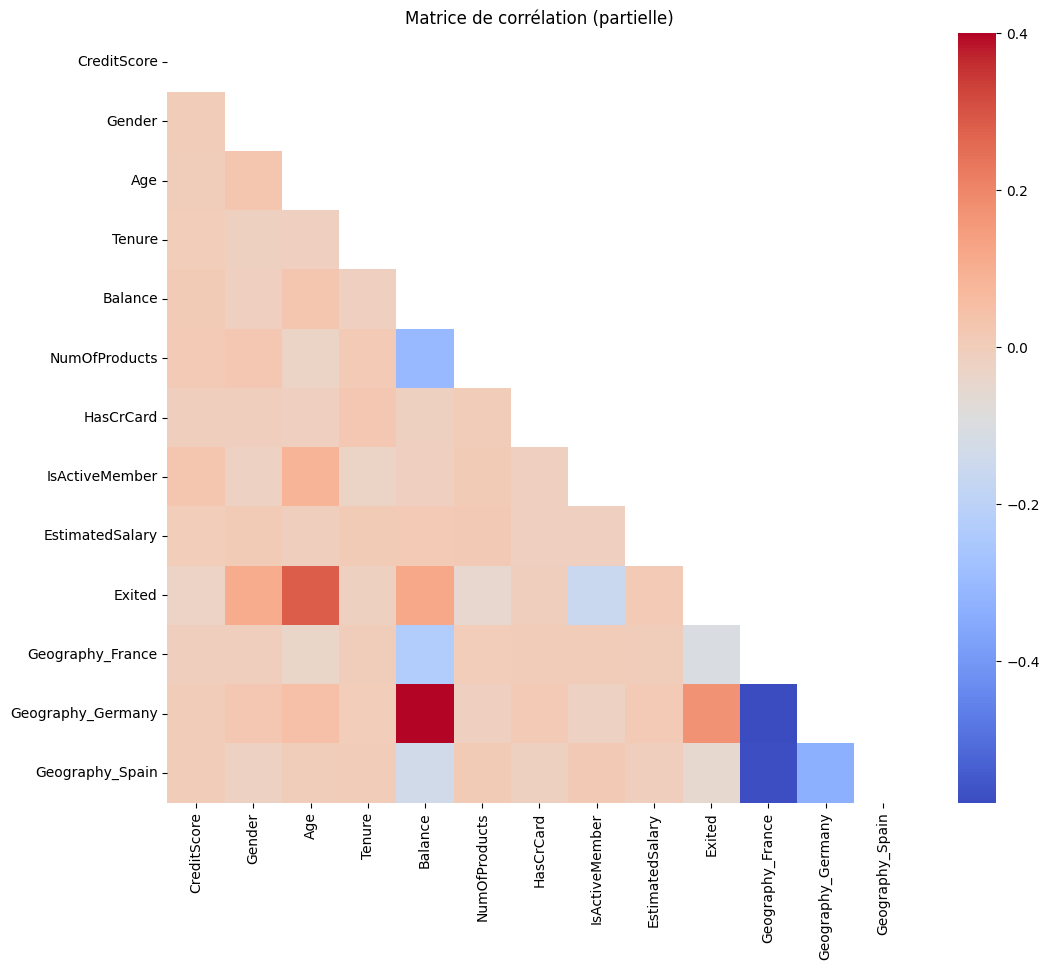

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

corr = data_encd.corr()
mask = np.triu(np.ones_like(corr, dtype=bool))

plt.figure(figsize=(12, 10))
sns.heatmap(corr, mask=mask, annot=False, cmap='coolwarm')
plt.title("Matrice de corrélation (partielle)")
plt.show()

Standardization


In [ ]:
from sklearn.preprocessing import minmax_scale

data_encd['Balance']=minmax_scale(data_encd['Balance'])
data_encd['Age']=minmax_scale(data_encd['Age'])
data_encd['EstimatedSalary']=minmax_scale(data_encd['EstimatedSalary'])
data_encd['CreditScore']=minmax_scale(data_encd['CreditScore'])
data_encd

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_France,Geography_Germany,Geography_Spain
0,0.538,1,0.324324,2,0.000000,1,1,1,0.506733,1,1,0,0
1,0.516,1,0.310811,1,0.334028,1,0,1,0.562708,0,0,0,1
2,0.304,1,0.324324,8,0.636354,3,1,0,0.569654,1,1,0,0
3,0.698,1,0.283784,1,0.000000,2,0,0,0.469120,0,1,0,0
4,1.000,1,0.337838,2,0.500243,1,1,1,0.395403,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,0.842,0,0.283784,5,0.000000,2,1,0,0.481341,0,1,0,0
9996,0.332,0,0.229730,10,0.228655,1,1,1,0.508488,0,1,0,0
9997,0.718,1,0.243243,7,0.000000,1,0,1,0.210390,1,1,0,0
9998,0.844,0,0.324324,3,0.299225,2,1,0,0.464429,1,0,1,0


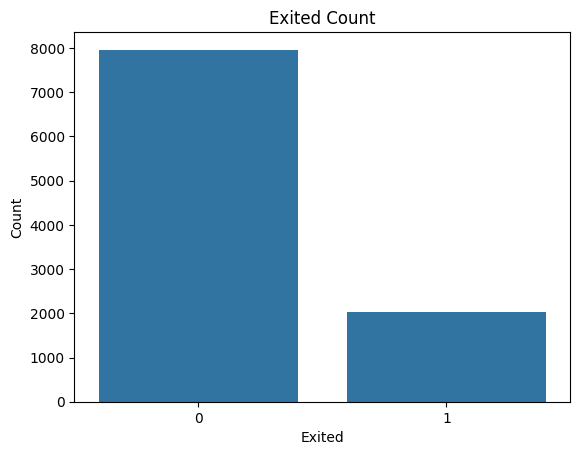

In [ ]:
from seaborn.categorical import countplot
import seaborn as sns
import matplotlib.pyplot as plt
sns=countplot(x='Exited',data=data)
plt.xlabel("Exited")
plt.ylabel("Count")
plt.title("Exited Count")
plt.show()


In [ ]:
y.value_counts()

,count
Exited,
0,7963
1,2037


Les classes ne sont pas équilibrées

In [ ]:
from imblearn.over_sampling import SMOTE
smote=SMOTE()
x_train,y_train=smote.fit_resample(x,y)
y_train.value_counts()


,count
Exited,
1,7963
0,7963


In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x_train,y_train,test_size=0.2,random_state=42)



Les modéles

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve, accuracy_score, precision_score, recall_score, f1_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

Logistic Regression

In [ ]:
Logistic_Reg=LogisticRegression(random_state=42)
Logistic_Reg.fit(x_train,y_train)
y_pred_log=Logistic_Reg.predict(x_test)

/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


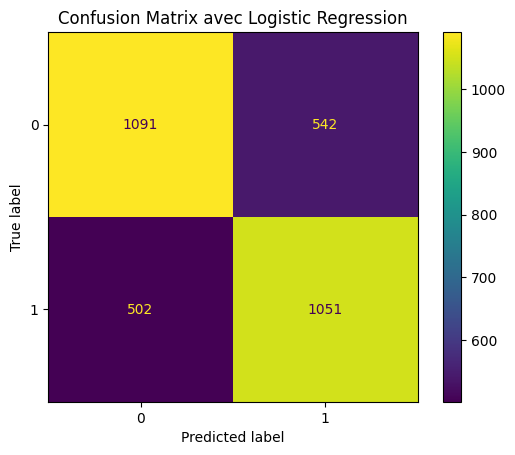

In [ ]:


cm =confusion_matrix(y_test, y_pred_log)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.title("Confusion Matrix avec Logistic Regression")
plt.show()


Random Forest

In [ ]:
Random_forest=RandomForestClassifier(n_estimators=100,criterion='gini',random_state=42)
Random_forest.fit(x_train,y_train)
y_pred_rf=Random_forest.predict(x_test)

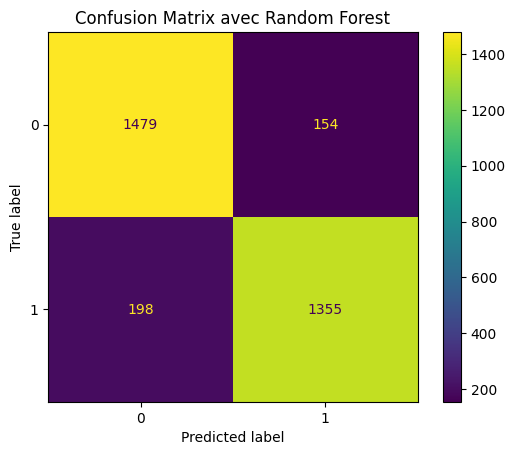

In [ ]:
cm =confusion_matrix(y_test, y_pred_rf)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.title("Confusion Matrix avec Random Forest")
plt.show()

XGBoost

In [ ]:
xgb=XGBClassifier()
xgb.fit(x_train,y_train)
y_pred_xgb=xgb.predict(x_test)

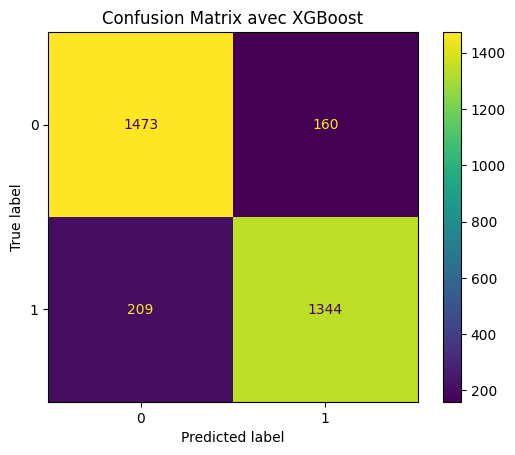

In [ ]:
cm =confusion_matrix(y_test, y_pred_xgb)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.title("Confusion Matrix avec XGBoost")
plt.show()

 Gradient Boosting

In [ ]:
gradient_bst=GradientBoostingClassifier(n_estimators=100,max_depth=5)
gradient_bst.fit(x_train,y_train)
y_pred_gb=gradient_bst.predict(x_test)


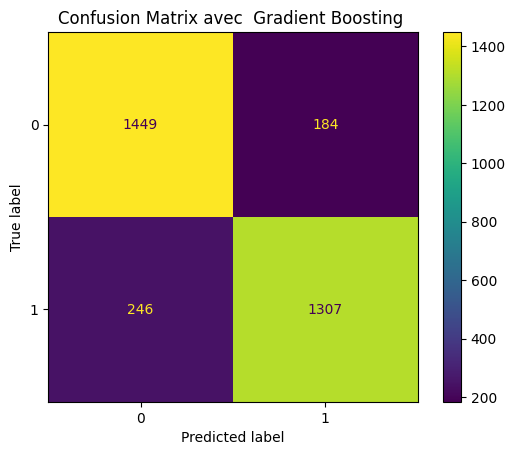

In [ ]:
cm =confusion_matrix(y_test, y_pred_gb)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.title("Confusion Matrix avec  Gradient Boosting ")
plt.show()

In [ ]:

results = pd.DataFrame({
    'Model': ['Logistic_Reg', 'Random_forest', 'gradient_bst','xgb'],
    'Accuracy': [
        accuracy_score(y_test, y_pred_log),
        accuracy_score(y_test, y_pred_rf),
        accuracy_score(y_test, y_pred_gb),
        accuracy_score(y_test, y_pred_xgb)

    ],
    'Precision': [
        precision_score(y_test, y_pred_log),
        precision_score(y_test, y_pred_rf),
        precision_score(y_test, y_pred_gb),
        precision_score(y_test, y_pred_xgb)

    ],
    'Recall': [
        recall_score(y_test, y_pred_log),
        recall_score(y_test, y_pred_rf),
        recall_score(y_test, y_pred_gb),
        recall_score(y_test, y_pred_xgb)
    ],
    'F1 Score': [
        f1_score(y_test, y_pred_log),
        f1_score(y_test, y_pred_rf),
        f1_score(y_test, y_pred_gb),
        f1_score(y_test, y_pred_xgb)
    ],
    'ROC AUC Score': [
        roc_auc_score(y_test,y_pred_log),
        roc_auc_score(y_test,y_pred_rf),
        roc_auc_score(y_test,y_pred_gb),
        roc_auc_score(y_test,y_pred_xgb)
    ]


})
results

,Model,Accuracy,Precision,Recall,F1 Score,ROC AUC Score
0,Logistic_Reg,0.672316,0.659761,0.676755,0.668150,0.672425
1,Random_forest,0.889517,0.897946,0.872505,0.885042,0.889100
2,gradient_bst,0.865035,0.876593,0.841597,0.858739,0.864460
3,xgb,0.884181,0.893617,0.865422,0.879293,0.883721


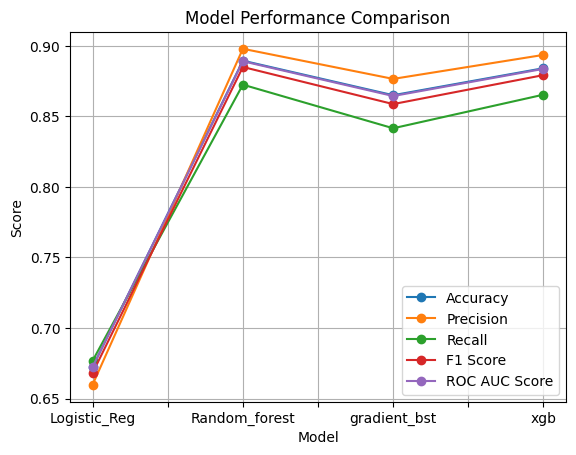

In [ ]:
results.plot(x='Model', y=['Accuracy', 'Precision', 'Recall', 'F1 Score','ROC AUC Score'], kind='line', marker='o')
plt.title('Model Performance Comparison')
plt.xlabel('Model')
plt.ylabel('Score')
plt.grid(True)
plt.show()

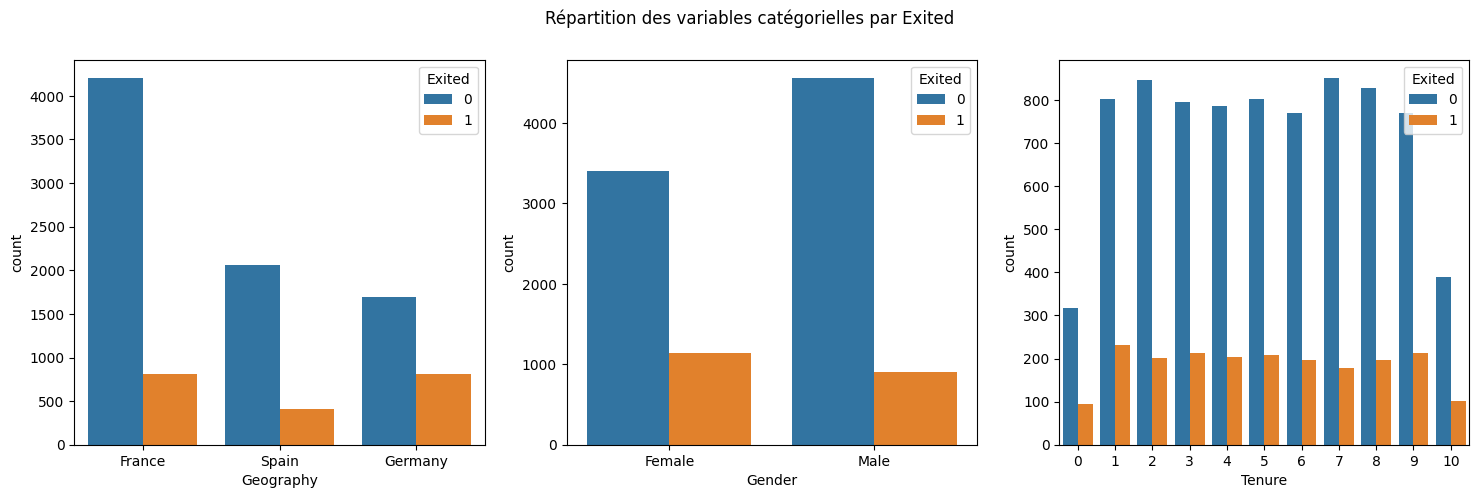

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# Ré-utilise 'data' avant one-hot encoding pour des visualisations plus lisibles
data_original = pd.read_csv(path)
data_original = data_original.drop(['RowNumber', 'CustomerId', 'Surname'], axis=1)

# 1. Histogrammes et distributions des variables numériques
fig = make_subplots(rows=2, cols=2, subplot_titles=('CreditScore', 'Age', 'Balance', 'EstimatedSalary'))

fig.add_trace(go.Histogram(x=data_original['CreditScore'], name='CreditScore'), row=1, col=1)
fig.add_trace(go.Histogram(x=data_original['Age'], name='Age'), row=1, col=2)
fig.add_trace(go.Histogram(x=data_original['Balance'], name='Balance'), row=2, col=1)
fig.add_trace(go.Histogram(x=data_original['EstimatedSalary'], name='EstimatedSalary'), row=2, col=2)

fig.update_layout(height=600, title_text="Distributions des variables numériques")
fig.show()

# 2. Boxplots par classe Exited
fig = make_subplots(rows=2, cols=2, subplot_titles=('CreditScore vs Exited', 'Age vs Exited', 'Balance vs Exited', 'EstimatedSalary vs Exited'))

fig.add_trace(go.Box(y=data_original['CreditScore'], x=data_original['Exited'], name='CreditScore'), row=1, col=1)
fig.add_trace(go.Box(y=data_original['Age'], x=data_original['Exited'], name='Age'), row=1, col=2)
fig.add_trace(go.Box(y=data_original['Balance'], x=data_original['Exited'], name='Balance'), row=2, col=1)
fig.add_trace(go.Box(y=data_original['EstimatedSalary'], x=data_original['Exited'], name='EstimatedSalary'), row=2, col=2)

fig.update_layout(height=700, title_text="Boxplots par statut de churn")
fig.show()

# 3. Countplots pour variables catégorielles
fig, axes = plt.subplots(1, 3, figsize=(18, 5))
sns.countplot(x='Geography', hue='Exited', data=data_original, ax=axes[0])
sns.countplot(x='Gender', hue='Exited', data=data_original, ax=axes[1])
sns.countplot(x='Tenure', hue='Exited', data=data_original, ax=axes[2])
plt.suptitle("Répartition des variables catégorielles par Exited")
plt.show()